# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.tsa.api as smt
import warnings 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
df=pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\car data DATASET.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [5]:
df['Fuel_Type']=df['Fuel_Type'].str.replace('Petrol','1').str.replace('Diesel','2').str.replace('CNG','3')
df['Fuel_Type']=df['Fuel_Type'].astype('float')

In [7]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
df['Seller_Type']=df['Seller_Type'].str.replace('Dealer','0').str.replace('Individual','1')
df['Seller_Type']=df['Seller_Type'].astype('float')

In [10]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
df['Transmission']=df['Transmission'].str.replace('Manual','0').str.replace('Automatic','1')
df['Transmission']=df['Transmission'].astype('float')

In [12]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type        float64
Seller_Type      float64
Transmission     float64
Owner              int64
dtype: object

In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.shape

(301, 9)

# Splitting data

In [38]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)

In [39]:
y=df['Selling_Price']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

In [44]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
150,2011,0.826,6000,1.0,1.0,0.0,0
179,2010,1.050,213000,1.0,1.0,0.0,0
205,2016,5.700,3493,1.0,0.0,0.0,1
246,2012,6.790,35000,1.0,0.0,0.0,0
285,2016,8.500,15059,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...
145,2012,0.810,19000,1.0,1.0,0.0,0
16,2015,10.790,41678,2.0,0.0,0.0,0
58,2014,6.800,39485,1.0,0.0,0.0,1
277,2015,13.600,21780,1.0,0.0,0.0,0


<font color='green'><h1>LINEAR REGRESSION</h1></font>

## Training Model

In [45]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.coef_

array([ 3.48929260e-01,  4.16495592e-01, -1.31676410e-05,  1.52037133e+00,
       -1.37956809e+00,  1.96047372e+00, -8.97035548e-01])

In [47]:
lr.intercept_

-702.1410986710043

## Predicting Test_input

In [48]:
predicted_value=lr.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error
cost=mean_squared_error(y_test,predicted_value)

In [50]:
cost

5.167492869814258

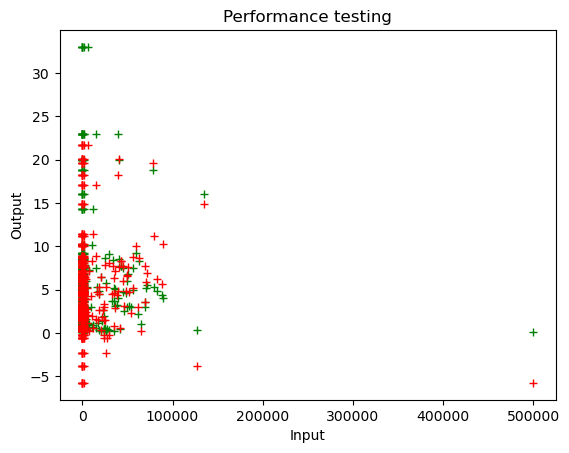

In [53]:
plt.plot(x_test,y_test,"+",color='green')
plt.plot(x_test,predicted_value,"+",color='red')
plt.title('Performance testing')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

# Linear Regression with OLS Summary

In [58]:
import statsmodels.api as sm
x_with_constant=sm.add_constant(x_train)

In [59]:
x_with_constant

,const,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
150,1.0,2011,0.826,6000,1.0,1.0,0.0,0
179,1.0,2010,1.050,213000,1.0,1.0,0.0,0
205,1.0,2016,5.700,3493,1.0,0.0,0.0,1
246,1.0,2012,6.790,35000,1.0,0.0,0.0,0
285,1.0,2016,8.500,15059,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
145,1.0,2012,0.810,19000,1.0,1.0,0.0,0
16,1.0,2015,10.790,41678,2.0,0.0,0.0,0
58,1.0,2014,6.800,39485,1.0,0.0,0.0,1
277,1.0,2015,13.600,21780,1.0,0.0,0.0,0


In [60]:
model=sm.OLS(y_train,x_with_constant)

In [62]:
result=model.fit()

In [63]:
result.params

const           -702.141099
Year               0.348929
Present_Price      0.416496
Kms_Driven        -0.000013
Fuel_Type          1.520371
Seller_Type       -1.379568
Transmission       1.960474
Owner             -0.897036
dtype: float64

In [64]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     247.8
Date:                Sat, 04 Nov 2023   Prob (F-statistic):           1.75e-95
Time:                        16:00:38   Log-Likelihood:                -389.93
No. Observations:                 210   AIC:                             795.9
Df Residuals:                     202   BIC:                             822.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -702.1411    105.222     -6.673

In [65]:
x_test=sm.add_constant(x_test)

In [66]:
y_pred=result.predict(x_test)

In [67]:
residual=y_test-y_pred

In [68]:
residual

288    0.711629
130   -1.257528
245   -0.725470
160    0.673907
124    0.327186
         ...   
62    -0.803752
159   -3.460237
101   -0.829608
210    0.230250
53     1.153552
Length: 91, dtype: float64

In [69]:
np.mean(residual)

-0.26995738143210996